In [267]:
#import necessary libaries
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
warnings.filterwarnings('ignore')

%matplotlib inline

In [133]:
#Loading the data
train = pd.read_csv("train.csv")  
test = pd.read_csv("test.csv") 

In [134]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [135]:
train = train.drop('Entry_id', axis = 1)

In [136]:
train.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [137]:
train['pay_schedule'].unique()

array(['bi-weekly', 'semi-monthly', 'weekly', 'monthly'], dtype=object)

In [138]:
train.isnull().sum()

age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [139]:
# #detecting outliers
# def outliers(df, feat):
#   q1 = df[feat].quantile(0.25)
#   q3 = df[feat].quantile(0.75)
#   iqr = q3 - q1

#   low_bond = q1 - 1.5 * iqr
#   upper_bond = q3 + 1.5 * iqr

#   out_index = df.index[(df[feat] < low_bond) | (df[feat] > upper_bond)]

#   return out_index

In [140]:
# # index_list = []
# # for i in int_col:
# index_list = outliers(train, 'income')

<AxesSubplot:xlabel='amount_requested'>

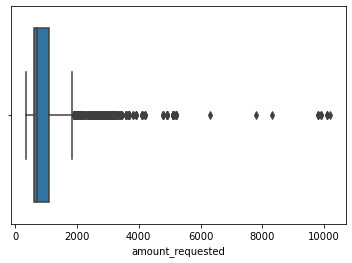

In [141]:
sns.boxplot(train['amount_requested'])

In [142]:
# train = train[train['amount_requested']<1400].reset_index(drop = True)

In [143]:
# train = train[train["age"] < 77].reset_index(drop = True)

In [144]:
# train = train[train["income"] < 6200].reset_index(drop = True)

In [145]:
train.shape

(12516, 20)

In [146]:
# def remove(df, ls):
#   ls = sorted(set(ls))
#   df = df.drop(index_list)
#   return df

In [147]:
# new_data = remove(train, index_list)

In [148]:
# train.shape, new_data.shape

<AxesSubplot:>

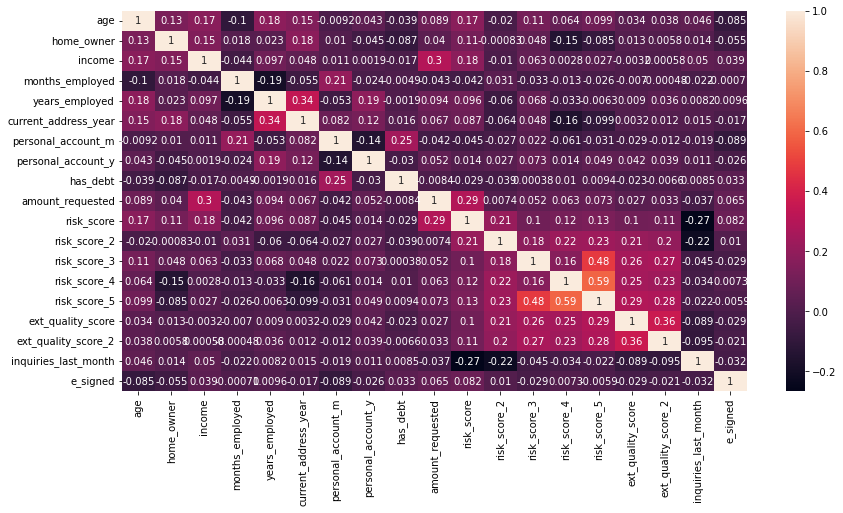

In [149]:
plt.figure(figsize = (14, 7))
sns.heatmap(train.corr(), annot = True)

<AxesSubplot:xlabel='e_signed', ylabel='count'>

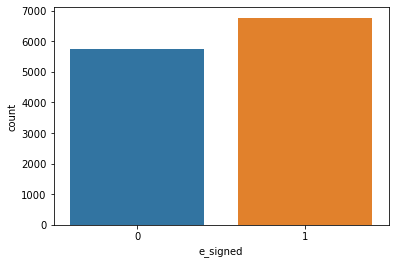

In [150]:
sns.countplot(train['e_signed'])

In [151]:
train.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [152]:
train.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [153]:
test.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

### Feature Engineering

In [154]:
# train['risk_score'] = train['risk_score'] / 100000

In [155]:
train['sum_risk_score'] = (train['risk_score'] + train['risk_score_2'] + train['risk_score_3'] + train['risk_score_4'] + train['risk_score_5']).abs()
train['mean_risk_score'] = train['sum_risk_score']/5

In [156]:
# test['risk_score'] = test['risk_score'] / 100000
test['sum_risk_score'] = (test['risk_score'] + test['risk_score_2'] + test['risk_score_3'] + test['risk_score_4'] + test['risk_score_5']).abs()
test['mean_risk_score'] = test['sum_risk_score'] / 5

In [157]:
# train = train.drop(['risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5'], axis = 1)

In [158]:
# test = test.drop(['Entry_id', 'risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'sum_risk_score'], axis = 1)

In [159]:
train['sum_ext_quality_score'] = (train['ext_quality_score'] + train['ext_quality_score_2']).abs()
train['mean_ext_quality_score'] = train[['ext_quality_score', 'ext_quality_score_2']].mean(axis = 1)

In [160]:
train['diff_ext_quality_score'] = (train['ext_quality_score'] - train['ext_quality_score_2']).abs()

In [161]:
test['sum_ext_quality_score'] = (test['ext_quality_score'] + test['ext_quality_score_2']).abs()
test['mean_ext_quality_score'] = test['sum_ext_quality_score'] / 2

In [162]:
test['diff_ext_quality_score'] = (test['ext_quality_score'] - test['ext_quality_score_2']).abs()

In [163]:
# train['ext_quality_score_div'] = (train['ext_quality_score'] / train['ext_quality_score_2']).abs()
train['ext_quality_score_std'] = train[['ext_quality_score', 'ext_quality_score_2']].std(axis = 1)

In [164]:
# train['std_risk_score'] = train[['risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5']].std(axis = 1)

In [165]:
# test['ext_quality_score_div'] = (test['ext_quality_score'] / test['ext_quality_score_2']).abs()
test['ext_quality_score_std'] = test[['ext_quality_score', 'ext_quality_score_2']].std(axis = 1)
# test['ext_quality_score_mul'] = (test['ext_quality_score'] * test['ext_quality_score_2']).abs()

In [166]:
# train['moving_quality_score_3'] = train['ext_quality_score'].rolling(3).mean()
# train['moving_quality_score_5'] = train['ext_quality_score'].rolling(5).mean()

# train['moving_quality_score_2_3'] = train['ext_quality_score_2'].rolling(3).mean()
# train['moving_quality_score_2_5'] = train['ext_quality_score_2'].rolling(5).mean()

# train['moving_risk_score_3'] = train['risk_score'].rolling(3).mean()
# train['moving_risk_score_2_3'] = train['risk_score_2'].rolling(3).mean()
# train['moving_risk_score_3_3'] = train['risk_score_3'].rolling(3).mean()
# train['moving_risk_score_4_3'] = train['risk_score_4'].rolling(3).mean()
# train['moving_risk_score_5_3'] = train['risk_score_5'].rolling(3).mean()

# train['moving_risk_score_5'] = train['risk_score'].rolling(5).mean()
# train['moving_risk_score_2_5'] = train['risk_score_2'].rolling(5).mean()
# train['moving_risk_score_3_5'] = train['risk_score_3'].rolling(5).mean()
# train['moving_risk_score_4_5'] = train['risk_score_4'].rolling(5).mean()
# train['moving_risk_score_5_5'] = train['risk_score_5'].rolling(5).mean()

In [167]:
train['income_age'] = train['income'] / train['age']
train['ammount_age'] = train['amount_requested'] / train['age']
train['amount_income'] = train['amount_requested']/ train['income']
train['personal_account_m_y'] = train['personal_account_y'] - train['personal_account_m']
train['work_year'] = train['income'] / train['years_employed']

In [168]:
test['income_age'] = test['income'] / test['age']
test['ammount_age'] = test['amount_requested'] / test['age']
test['amount_income'] = test['amount_requested']/ test['income']
test['personal_account_m_y'] = test['personal_account_y'] - test['personal_account_m']
test['work_year'] = test['income'] / test['years_employed']

In [169]:
train.shape

(12516, 31)

In [170]:
test.shape

(5392, 31)

In [171]:
train.isnull().sum()

age                       0
pay_schedule              0
home_owner                0
income                    0
months_employed           0
years_employed            0
current_address_year      0
personal_account_m        0
personal_account_y        0
has_debt                  0
amount_requested          0
risk_score                0
risk_score_2              0
risk_score_3              0
risk_score_4              0
risk_score_5              0
ext_quality_score         0
ext_quality_score_2       0
inquiries_last_month      0
e_signed                  0
sum_risk_score            0
mean_risk_score           0
sum_ext_quality_score     0
mean_ext_quality_score    0
diff_ext_quality_score    0
ext_quality_score_std     0
income_age                0
ammount_age               0
amount_income             0
personal_account_m_y      0
work_year                 0
dtype: int64

In [172]:
# # Coluums with missing values
# cols_with_missing = [col for col in train.columns
#                      if train[col].isnull().any()]

# for i in cols_with_missing:
#   train[i] = train[i].fillna(train[i].mean)

In [173]:
# a = test.copy()

In [174]:
test.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'sum_risk_score',
       'mean_risk_score', 'sum_ext_quality_score', 'mean_ext_quality_score',
       'diff_ext_quality_score', 'ext_quality_score_std', 'income_age',
       'ammount_age', 'amount_income', 'personal_account_m_y', 'work_year'],
      dtype='object')

In [175]:
# train = train.drop(['ext_quality_score', 'ext_quality_score_2','sum_ext_quality_score'], axis = 1)

In [176]:
# train = train.drop('Entry_id', axis = 1)
test = test.drop('Entry_id', axis=1)

In [177]:
train = train.join(pd.get_dummies(train.pay_schedule))
test = test.join(pd.get_dummies(test.pay_schedule))

In [178]:
to_drop = ['risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'pay_schedule']

In [179]:
test = test.drop(to_drop, axis = 1)
train = train.drop(to_drop, axis = 1)

In [180]:
# test = test.drop(['has_debt', 'home_owner', 'personal_account_m'], axis = 1)
# train = train.drop(['has_debt', 'home_owner', 'personal_account_m'], axis = 1)

In [182]:
print(train.shape)
print(test.shape)

(12516, 27)
(5392, 26)


In [183]:
# train = train.drop(['risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score', 'ext_quality_score_2'], axis = 1)

In [184]:
train.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,ext_quality_score_std,income_age,ammount_age,amount_income,personal_account_m_y,work_year,bi-weekly,monthly,semi-monthly,weekly
0,40,1,3135,0,3,3,6,2,1,550,...,0.141421,78.375000,13.750000,0.175439,-4,1045.00,1,0,0,0
1,33,0,3590,0,5,2,2,8,1,1100,...,0.000000,108.787879,33.333333,0.306407,6,718.00,0,0,1,0
2,21,0,2303,0,5,8,2,7,1,600,...,0.070711,109.666667,28.571429,0.260530,5,460.60,0,0,0,1
3,26,0,2795,0,4,4,1,6,1,800,...,0.070711,107.500000,30.769231,0.286225,5,698.75,1,0,0,0
4,43,0,5000,0,2,1,1,2,1,1100,...,0.141421,116.279070,25.581395,0.220000,1,2500.00,1,0,0,0


In [185]:
# t_train = train.copy()

In [186]:
# # log_col = ['amount_requested', 'mean_risk_score']
# for i in log_col:
#   t_train[i] = np.log(t_train[i])

In [187]:
# log_col = ['amount_requested', 'mean_risk_score']
# for i in log_col:
#   test[i] = np.log(test[i])

In [188]:
# from sklearn.preprocessing import LabelEncoder
# lee = LabelEncoder()

# test['pay_schedule'] = lee.fit_transform(test['pay_schedule'])

In [ ]:
# # from sklearn.preprocessing import LabelEncoder
# # le = LabelEncoder()

#  train['pay_schedule'] = le.fit_transform(train['pay_schedule'])

## Modelling

In [190]:
x = train.drop('e_signed', axis = 1)
y = train['e_signed']

### Catboost

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [192]:
import catboost as ctb

In [194]:
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_train, y_train)

In [221]:
ct_mod = ctb.CatBoostClassifier(n_estimators=5000, learning_rate=0.01)
ct_mod.fit(x_train, y_train)

0:	learn: 0.6924558	total: 8.23ms	remaining: 57.6s
1:	learn: 0.6917276	total: 15ms	remaining: 52.7s
2:	learn: 0.6909757	total: 21.8ms	remaining: 50.9s
3:	learn: 0.6903167	total: 28.5ms	remaining: 49.9s
4:	learn: 0.6896537	total: 34.9ms	remaining: 48.8s
5:	learn: 0.6890197	total: 41.7ms	remaining: 48.6s
6:	learn: 0.6882927	total: 48.4ms	remaining: 48.3s
7:	learn: 0.6876514	total: 55.4ms	remaining: 48.4s
8:	learn: 0.6870167	total: 61.8ms	remaining: 48s
9:	learn: 0.6863596	total: 68.3ms	remaining: 47.8s
10:	learn: 0.6858922	total: 74.7ms	remaining: 47.4s
11:	learn: 0.6853290	total: 81.2ms	remaining: 47.3s
12:	learn: 0.6847138	total: 87.8ms	remaining: 47.2s
13:	learn: 0.6841260	total: 94.4ms	remaining: 47.1s
14:	learn: 0.6836266	total: 101ms	remaining: 47s
15:	learn: 0.6830516	total: 107ms	remaining: 46.8s
16:	learn: 0.6825060	total: 114ms	remaining: 46.7s
17:	learn: 0.6819103	total: 120ms	remaining: 46.6s
18:	learn: 0.6813211	total: 127ms	remaining: 46.7s
19:	learn: 0.6807730	total: 134ms

162:	learn: 0.6389597	total: 1.1s	remaining: 46.2s
163:	learn: 0.6388286	total: 1.11s	remaining: 46.2s
164:	learn: 0.6386864	total: 1.12s	remaining: 46.2s
165:	learn: 0.6385261	total: 1.12s	remaining: 46.2s
166:	learn: 0.6383684	total: 1.13s	remaining: 46.2s
167:	learn: 0.6382370	total: 1.14s	remaining: 46.2s
168:	learn: 0.6380914	total: 1.14s	remaining: 46.2s
169:	learn: 0.6379275	total: 1.15s	remaining: 46.2s
170:	learn: 0.6377853	total: 1.16s	remaining: 46.2s
171:	learn: 0.6376679	total: 1.16s	remaining: 46.1s
172:	learn: 0.6375272	total: 1.17s	remaining: 46.1s
173:	learn: 0.6373551	total: 1.18s	remaining: 46.1s
174:	learn: 0.6371788	total: 1.18s	remaining: 46.1s
175:	learn: 0.6370546	total: 1.19s	remaining: 46.1s
176:	learn: 0.6368255	total: 1.19s	remaining: 46.1s
177:	learn: 0.6367270	total: 1.2s	remaining: 46s
178:	learn: 0.6365364	total: 1.21s	remaining: 46s
179:	learn: 0.6363749	total: 1.21s	remaining: 46s
180:	learn: 0.6362126	total: 1.22s	remaining: 46s
181:	learn: 0.6360981	

325:	learn: 0.6195422	total: 2.19s	remaining: 44.8s
326:	learn: 0.6194665	total: 2.19s	remaining: 44.8s
327:	learn: 0.6193802	total: 2.2s	remaining: 44.8s
328:	learn: 0.6192607	total: 2.21s	remaining: 44.8s
329:	learn: 0.6191536	total: 2.22s	remaining: 44.8s
330:	learn: 0.6190421	total: 2.22s	remaining: 44.8s
331:	learn: 0.6189059	total: 2.23s	remaining: 44.8s
332:	learn: 0.6188321	total: 2.24s	remaining: 44.8s
333:	learn: 0.6187285	total: 2.24s	remaining: 44.8s
334:	learn: 0.6186639	total: 2.25s	remaining: 44.8s
335:	learn: 0.6185804	total: 2.26s	remaining: 44.8s
336:	learn: 0.6184900	total: 2.26s	remaining: 44.8s
337:	learn: 0.6183653	total: 2.27s	remaining: 44.7s
338:	learn: 0.6182824	total: 2.28s	remaining: 44.7s
339:	learn: 0.6181611	total: 2.28s	remaining: 44.7s
340:	learn: 0.6180632	total: 2.29s	remaining: 44.7s
341:	learn: 0.6180000	total: 2.3s	remaining: 44.7s
342:	learn: 0.6179175	total: 2.3s	remaining: 44.7s
343:	learn: 0.6178450	total: 2.31s	remaining: 44.7s
344:	learn: 0.6

487:	learn: 0.6058280	total: 3.28s	remaining: 43.8s
488:	learn: 0.6057203	total: 3.29s	remaining: 43.7s
489:	learn: 0.6056836	total: 3.29s	remaining: 43.7s
490:	learn: 0.6056584	total: 3.3s	remaining: 43.7s
491:	learn: 0.6055930	total: 3.31s	remaining: 43.7s
492:	learn: 0.6055278	total: 3.31s	remaining: 43.7s
493:	learn: 0.6054493	total: 3.32s	remaining: 43.7s
494:	learn: 0.6053725	total: 3.33s	remaining: 43.7s
495:	learn: 0.6053003	total: 3.33s	remaining: 43.7s
496:	learn: 0.6052126	total: 3.34s	remaining: 43.7s
497:	learn: 0.6051346	total: 3.35s	remaining: 43.7s
498:	learn: 0.6050907	total: 3.35s	remaining: 43.7s
499:	learn: 0.6050499	total: 3.36s	remaining: 43.7s
500:	learn: 0.6049973	total: 3.37s	remaining: 43.7s
501:	learn: 0.6049044	total: 3.37s	remaining: 43.7s
502:	learn: 0.6048237	total: 3.38s	remaining: 43.7s
503:	learn: 0.6047540	total: 3.39s	remaining: 43.7s
504:	learn: 0.6047151	total: 3.39s	remaining: 43.7s
505:	learn: 0.6046627	total: 3.4s	remaining: 43.6s
506:	learn: 0.

647:	learn: 0.5953079	total: 4.37s	remaining: 42.8s
648:	learn: 0.5952341	total: 4.37s	remaining: 42.8s
649:	learn: 0.5951509	total: 4.38s	remaining: 42.8s
650:	learn: 0.5950607	total: 4.39s	remaining: 42.8s
651:	learn: 0.5949975	total: 4.39s	remaining: 42.8s
652:	learn: 0.5949098	total: 4.4s	remaining: 42.8s
653:	learn: 0.5948511	total: 4.41s	remaining: 42.8s
654:	learn: 0.5947854	total: 4.42s	remaining: 42.8s
655:	learn: 0.5947626	total: 4.42s	remaining: 42.8s
656:	learn: 0.5947125	total: 4.43s	remaining: 42.8s
657:	learn: 0.5946930	total: 4.44s	remaining: 42.8s
658:	learn: 0.5946250	total: 4.44s	remaining: 42.8s
659:	learn: 0.5945430	total: 4.45s	remaining: 42.7s
660:	learn: 0.5944794	total: 4.46s	remaining: 42.7s
661:	learn: 0.5944297	total: 4.46s	remaining: 42.7s
662:	learn: 0.5943892	total: 4.47s	remaining: 42.7s
663:	learn: 0.5943299	total: 4.48s	remaining: 42.7s
664:	learn: 0.5942444	total: 4.48s	remaining: 42.7s
665:	learn: 0.5941805	total: 4.49s	remaining: 42.7s
666:	learn: 0

808:	learn: 0.5852427	total: 5.45s	remaining: 41.7s
809:	learn: 0.5851785	total: 5.46s	remaining: 41.7s
810:	learn: 0.5851108	total: 5.46s	remaining: 41.7s
811:	learn: 0.5850791	total: 5.47s	remaining: 41.7s
812:	learn: 0.5849814	total: 5.48s	remaining: 41.7s
813:	learn: 0.5849289	total: 5.49s	remaining: 41.7s
814:	learn: 0.5848997	total: 5.49s	remaining: 41.7s
815:	learn: 0.5848733	total: 5.5s	remaining: 41.7s
816:	learn: 0.5848162	total: 5.5s	remaining: 41.7s
817:	learn: 0.5847230	total: 5.51s	remaining: 41.7s
818:	learn: 0.5846580	total: 5.52s	remaining: 41.7s
819:	learn: 0.5846103	total: 5.53s	remaining: 41.6s
820:	learn: 0.5845372	total: 5.53s	remaining: 41.6s
821:	learn: 0.5844831	total: 5.54s	remaining: 41.6s
822:	learn: 0.5843985	total: 5.55s	remaining: 41.6s
823:	learn: 0.5843403	total: 5.55s	remaining: 41.6s
824:	learn: 0.5842974	total: 5.56s	remaining: 41.6s
825:	learn: 0.5842663	total: 5.57s	remaining: 41.6s
826:	learn: 0.5842234	total: 5.57s	remaining: 41.6s
827:	learn: 0.

969:	learn: 0.5750314	total: 6.54s	remaining: 40.6s
970:	learn: 0.5749818	total: 6.54s	remaining: 40.6s
971:	learn: 0.5749436	total: 6.55s	remaining: 40.6s
972:	learn: 0.5748747	total: 6.56s	remaining: 40.6s
973:	learn: 0.5748228	total: 6.57s	remaining: 40.6s
974:	learn: 0.5747104	total: 6.57s	remaining: 40.6s
975:	learn: 0.5746272	total: 6.58s	remaining: 40.6s
976:	learn: 0.5745678	total: 6.59s	remaining: 40.6s
977:	learn: 0.5744637	total: 6.59s	remaining: 40.6s
978:	learn: 0.5743871	total: 6.6s	remaining: 40.6s
979:	learn: 0.5743335	total: 6.61s	remaining: 40.6s
980:	learn: 0.5742556	total: 6.62s	remaining: 40.6s
981:	learn: 0.5741978	total: 6.62s	remaining: 40.6s
982:	learn: 0.5741343	total: 6.63s	remaining: 40.6s
983:	learn: 0.5740898	total: 6.64s	remaining: 40.6s
984:	learn: 0.5740580	total: 6.64s	remaining: 40.6s
985:	learn: 0.5739691	total: 6.65s	remaining: 40.6s
986:	learn: 0.5739238	total: 6.66s	remaining: 40.6s
987:	learn: 0.5738390	total: 6.67s	remaining: 40.6s
988:	learn: 0

1151:	learn: 0.5626661	total: 7.81s	remaining: 39.6s
1152:	learn: 0.5625811	total: 7.81s	remaining: 39.6s
1153:	learn: 0.5625049	total: 7.82s	remaining: 39.6s
1154:	learn: 0.5624271	total: 7.83s	remaining: 39.6s
1155:	learn: 0.5623440	total: 7.83s	remaining: 39.6s
1156:	learn: 0.5622871	total: 7.84s	remaining: 39.6s
1157:	learn: 0.5622402	total: 7.85s	remaining: 39.6s
1158:	learn: 0.5621837	total: 7.86s	remaining: 39.6s
1159:	learn: 0.5620930	total: 7.86s	remaining: 39.6s
1160:	learn: 0.5620221	total: 7.87s	remaining: 39.6s
1161:	learn: 0.5619671	total: 7.88s	remaining: 39.6s
1162:	learn: 0.5619028	total: 7.88s	remaining: 39.6s
1163:	learn: 0.5618444	total: 7.89s	remaining: 39.6s
1164:	learn: 0.5617803	total: 7.9s	remaining: 39.6s
1165:	learn: 0.5617079	total: 7.9s	remaining: 39.5s
1166:	learn: 0.5616156	total: 7.91s	remaining: 39.5s
1167:	learn: 0.5615357	total: 7.92s	remaining: 39.5s
1168:	learn: 0.5614690	total: 7.92s	remaining: 39.5s
1169:	learn: 0.5614065	total: 7.93s	remaining: 3

1308:	learn: 0.5527529	total: 8.89s	remaining: 38.7s
1309:	learn: 0.5526974	total: 8.9s	remaining: 38.6s
1310:	learn: 0.5526373	total: 8.9s	remaining: 38.6s
1311:	learn: 0.5525710	total: 8.91s	remaining: 38.6s
1312:	learn: 0.5525299	total: 8.92s	remaining: 38.6s
1313:	learn: 0.5524746	total: 8.93s	remaining: 38.6s
1314:	learn: 0.5524117	total: 8.93s	remaining: 38.6s
1315:	learn: 0.5523388	total: 8.94s	remaining: 38.6s
1316:	learn: 0.5522708	total: 8.95s	remaining: 38.6s
1317:	learn: 0.5522493	total: 8.95s	remaining: 38.6s
1318:	learn: 0.5521808	total: 8.96s	remaining: 38.6s
1319:	learn: 0.5521230	total: 8.96s	remaining: 38.6s
1320:	learn: 0.5520660	total: 8.97s	remaining: 38.6s
1321:	learn: 0.5519682	total: 8.98s	remaining: 38.6s
1322:	learn: 0.5519216	total: 8.98s	remaining: 38.6s
1323:	learn: 0.5518820	total: 8.99s	remaining: 38.5s
1324:	learn: 0.5518126	total: 9s	remaining: 38.5s
1325:	learn: 0.5517249	total: 9.01s	remaining: 38.5s
1326:	learn: 0.5516726	total: 9.01s	remaining: 38.5

1466:	learn: 0.5434003	total: 9.97s	remaining: 37.6s
1467:	learn: 0.5433338	total: 9.98s	remaining: 37.6s
1468:	learn: 0.5432679	total: 9.99s	remaining: 37.6s
1469:	learn: 0.5431926	total: 9.99s	remaining: 37.6s
1470:	learn: 0.5431288	total: 10s	remaining: 37.6s
1471:	learn: 0.5430770	total: 10s	remaining: 37.6s
1472:	learn: 0.5430192	total: 10s	remaining: 37.6s
1473:	learn: 0.5429404	total: 10s	remaining: 37.6s
1474:	learn: 0.5428649	total: 10s	remaining: 37.6s
1475:	learn: 0.5428227	total: 10s	remaining: 37.6s
1476:	learn: 0.5427580	total: 10s	remaining: 37.6s
1477:	learn: 0.5427043	total: 10s	remaining: 37.5s
1478:	learn: 0.5426519	total: 10.1s	remaining: 37.5s
1479:	learn: 0.5425831	total: 10.1s	remaining: 37.5s
1480:	learn: 0.5425213	total: 10.1s	remaining: 37.5s
1481:	learn: 0.5424390	total: 10.1s	remaining: 37.5s
1482:	learn: 0.5423925	total: 10.1s	remaining: 37.5s
1483:	learn: 0.5423277	total: 10.1s	remaining: 37.5s
1484:	learn: 0.5422772	total: 10.1s	remaining: 37.5s
1485:	lea

1643:	learn: 0.5335261	total: 11.2s	remaining: 36.4s
1644:	learn: 0.5335232	total: 11.2s	remaining: 36.4s
1645:	learn: 0.5334528	total: 11.2s	remaining: 36.4s
1646:	learn: 0.5334082	total: 11.2s	remaining: 36.3s
1647:	learn: 0.5333361	total: 11.2s	remaining: 36.3s
1648:	learn: 0.5332855	total: 11.2s	remaining: 36.3s
1649:	learn: 0.5332131	total: 11.2s	remaining: 36.3s
1650:	learn: 0.5331718	total: 11.2s	remaining: 36.3s
1651:	learn: 0.5331247	total: 11.2s	remaining: 36.3s
1652:	learn: 0.5330785	total: 11.2s	remaining: 36.3s
1653:	learn: 0.5330618	total: 11.2s	remaining: 36.3s
1654:	learn: 0.5330099	total: 11.2s	remaining: 36.3s
1655:	learn: 0.5329505	total: 11.2s	remaining: 36.3s
1656:	learn: 0.5329106	total: 11.2s	remaining: 36.3s
1657:	learn: 0.5328420	total: 11.3s	remaining: 36.3s
1658:	learn: 0.5327618	total: 11.3s	remaining: 36.3s
1659:	learn: 0.5327172	total: 11.3s	remaining: 36.3s
1660:	learn: 0.5326510	total: 11.3s	remaining: 36.2s
1661:	learn: 0.5326084	total: 11.3s	remaining:

1801:	learn: 0.5251066	total: 12.2s	remaining: 35.3s
1802:	learn: 0.5250607	total: 12.3s	remaining: 35.3s
1803:	learn: 0.5249760	total: 12.3s	remaining: 35.3s
1804:	learn: 0.5249119	total: 12.3s	remaining: 35.3s
1805:	learn: 0.5248578	total: 12.3s	remaining: 35.3s
1806:	learn: 0.5248146	total: 12.3s	remaining: 35.3s
1807:	learn: 0.5247569	total: 12.3s	remaining: 35.3s
1808:	learn: 0.5247102	total: 12.3s	remaining: 35.3s
1809:	learn: 0.5246605	total: 12.3s	remaining: 35.3s
1810:	learn: 0.5246082	total: 12.3s	remaining: 35.3s
1811:	learn: 0.5245312	total: 12.3s	remaining: 35.3s
1812:	learn: 0.5244781	total: 12.3s	remaining: 35.3s
1813:	learn: 0.5244291	total: 12.3s	remaining: 35.3s
1814:	learn: 0.5243740	total: 12.3s	remaining: 35.3s
1815:	learn: 0.5243089	total: 12.3s	remaining: 35.2s
1816:	learn: 0.5242857	total: 12.4s	remaining: 35.2s
1817:	learn: 0.5242323	total: 12.4s	remaining: 35.2s
1818:	learn: 0.5241928	total: 12.4s	remaining: 35.2s
1819:	learn: 0.5241578	total: 12.4s	remaining:

1962:	learn: 0.5165946	total: 13.3s	remaining: 34.2s
1963:	learn: 0.5165448	total: 13.3s	remaining: 34.2s
1964:	learn: 0.5165000	total: 13.3s	remaining: 34.2s
1965:	learn: 0.5164551	total: 13.4s	remaining: 34.2s
1966:	learn: 0.5163899	total: 13.4s	remaining: 34.2s
1967:	learn: 0.5163148	total: 13.4s	remaining: 34.2s
1968:	learn: 0.5162847	total: 13.4s	remaining: 34.2s
1969:	learn: 0.5162197	total: 13.4s	remaining: 34.2s
1970:	learn: 0.5161872	total: 13.4s	remaining: 34.2s
1971:	learn: 0.5161388	total: 13.4s	remaining: 34.2s
1972:	learn: 0.5160886	total: 13.4s	remaining: 34.2s
1973:	learn: 0.5160491	total: 13.4s	remaining: 34.1s
1974:	learn: 0.5160150	total: 13.4s	remaining: 34.1s
1975:	learn: 0.5160051	total: 13.4s	remaining: 34.1s
1976:	learn: 0.5159517	total: 13.4s	remaining: 34.1s
1977:	learn: 0.5159049	total: 13.4s	remaining: 34.1s
1978:	learn: 0.5158831	total: 13.4s	remaining: 34.1s
1979:	learn: 0.5158108	total: 13.4s	remaining: 34.1s
1980:	learn: 0.5157376	total: 13.5s	remaining:

2124:	learn: 0.5087254	total: 14.4s	remaining: 33.1s
2125:	learn: 0.5086653	total: 14.4s	remaining: 33.1s
2126:	learn: 0.5085952	total: 14.4s	remaining: 33.1s
2127:	learn: 0.5085759	total: 14.4s	remaining: 33.1s
2128:	learn: 0.5085166	total: 14.5s	remaining: 33.1s
2129:	learn: 0.5084812	total: 14.5s	remaining: 33.1s
2130:	learn: 0.5084279	total: 14.5s	remaining: 33.1s
2131:	learn: 0.5083971	total: 14.5s	remaining: 33s
2132:	learn: 0.5083534	total: 14.5s	remaining: 33s
2133:	learn: 0.5083186	total: 14.5s	remaining: 33s
2134:	learn: 0.5082561	total: 14.5s	remaining: 33s
2135:	learn: 0.5082237	total: 14.5s	remaining: 33s
2136:	learn: 0.5081693	total: 14.5s	remaining: 33s
2137:	learn: 0.5081471	total: 14.5s	remaining: 33s
2138:	learn: 0.5081113	total: 14.5s	remaining: 33s
2139:	learn: 0.5080521	total: 14.5s	remaining: 33s
2140:	learn: 0.5080489	total: 14.5s	remaining: 33s
2141:	learn: 0.5079876	total: 14.5s	remaining: 33s
2142:	learn: 0.5079193	total: 14.5s	remaining: 33s
2143:	learn: 0.50

2286:	learn: 0.5012349	total: 15.5s	remaining: 32s
2287:	learn: 0.5011912	total: 15.5s	remaining: 32s
2288:	learn: 0.5011506	total: 15.5s	remaining: 32s
2289:	learn: 0.5011167	total: 15.5s	remaining: 31.9s
2290:	learn: 0.5010585	total: 15.5s	remaining: 31.9s
2291:	learn: 0.5009943	total: 15.5s	remaining: 31.9s
2292:	learn: 0.5009578	total: 15.6s	remaining: 31.9s
2293:	learn: 0.5009219	total: 15.6s	remaining: 31.9s
2294:	learn: 0.5008683	total: 15.6s	remaining: 31.9s
2295:	learn: 0.5007995	total: 15.6s	remaining: 31.9s
2296:	learn: 0.5007569	total: 15.6s	remaining: 31.9s
2297:	learn: 0.5007162	total: 15.6s	remaining: 31.9s
2298:	learn: 0.5006679	total: 15.6s	remaining: 31.9s
2299:	learn: 0.5006272	total: 15.6s	remaining: 31.9s
2300:	learn: 0.5005636	total: 15.6s	remaining: 31.9s
2301:	learn: 0.5005306	total: 15.6s	remaining: 31.9s
2302:	learn: 0.5005056	total: 15.6s	remaining: 31.9s
2303:	learn: 0.5004648	total: 15.6s	remaining: 31.8s
2304:	learn: 0.5004210	total: 15.6s	remaining: 31.8s

2449:	learn: 0.4941264	total: 16.6s	remaining: 30.8s
2450:	learn: 0.4940910	total: 16.6s	remaining: 30.8s
2451:	learn: 0.4940265	total: 16.6s	remaining: 30.8s
2452:	learn: 0.4939846	total: 16.6s	remaining: 30.8s
2453:	learn: 0.4939542	total: 16.6s	remaining: 30.8s
2454:	learn: 0.4939142	total: 16.6s	remaining: 30.8s
2455:	learn: 0.4938799	total: 16.6s	remaining: 30.8s
2456:	learn: 0.4938694	total: 16.6s	remaining: 30.8s
2457:	learn: 0.4938322	total: 16.7s	remaining: 30.8s
2458:	learn: 0.4937719	total: 16.7s	remaining: 30.8s
2459:	learn: 0.4937615	total: 16.7s	remaining: 30.8s
2460:	learn: 0.4937169	total: 16.7s	remaining: 30.8s
2461:	learn: 0.4936527	total: 16.7s	remaining: 30.7s
2462:	learn: 0.4935903	total: 16.7s	remaining: 30.7s
2463:	learn: 0.4935265	total: 16.7s	remaining: 30.7s
2464:	learn: 0.4934860	total: 16.7s	remaining: 30.7s
2465:	learn: 0.4934343	total: 16.7s	remaining: 30.7s
2466:	learn: 0.4933830	total: 16.7s	remaining: 30.7s
2467:	learn: 0.4933579	total: 16.7s	remaining:

2611:	learn: 0.4870753	total: 17.7s	remaining: 29.7s
2612:	learn: 0.4870150	total: 17.7s	remaining: 29.7s
2613:	learn: 0.4869703	total: 17.7s	remaining: 29.7s
2614:	learn: 0.4869560	total: 17.7s	remaining: 29.7s
2615:	learn: 0.4869366	total: 17.7s	remaining: 29.7s
2616:	learn: 0.4868979	total: 17.7s	remaining: 29.7s
2617:	learn: 0.4868613	total: 17.7s	remaining: 29.7s
2618:	learn: 0.4868094	total: 17.7s	remaining: 29.7s
2619:	learn: 0.4867783	total: 17.7s	remaining: 29.7s
2620:	learn: 0.4867441	total: 17.7s	remaining: 29.6s
2621:	learn: 0.4867371	total: 17.8s	remaining: 29.6s
2622:	learn: 0.4867154	total: 17.8s	remaining: 29.6s
2623:	learn: 0.4866572	total: 17.8s	remaining: 29.6s
2624:	learn: 0.4866376	total: 17.8s	remaining: 29.6s
2625:	learn: 0.4866028	total: 17.8s	remaining: 29.6s
2626:	learn: 0.4865383	total: 17.8s	remaining: 29.6s
2627:	learn: 0.4865035	total: 17.8s	remaining: 29.6s
2628:	learn: 0.4864637	total: 17.8s	remaining: 29.6s
2629:	learn: 0.4864131	total: 17.8s	remaining:

2774:	learn: 0.4805047	total: 18.8s	remaining: 28.6s
2775:	learn: 0.4804974	total: 18.8s	remaining: 28.6s
2776:	learn: 0.4804343	total: 18.8s	remaining: 28.6s
2777:	learn: 0.4804234	total: 18.8s	remaining: 28.6s
2778:	learn: 0.4803723	total: 18.8s	remaining: 28.6s
2779:	learn: 0.4803218	total: 18.8s	remaining: 28.5s
2780:	learn: 0.4802849	total: 18.8s	remaining: 28.5s
2781:	learn: 0.4802830	total: 18.8s	remaining: 28.5s
2782:	learn: 0.4802702	total: 18.8s	remaining: 28.5s
2783:	learn: 0.4802278	total: 18.8s	remaining: 28.5s
2784:	learn: 0.4801651	total: 18.8s	remaining: 28.5s
2785:	learn: 0.4801113	total: 18.8s	remaining: 28.5s
2786:	learn: 0.4800754	total: 18.9s	remaining: 28.5s
2787:	learn: 0.4800197	total: 18.9s	remaining: 28.5s
2788:	learn: 0.4799691	total: 18.9s	remaining: 28.5s
2789:	learn: 0.4799423	total: 18.9s	remaining: 28.5s
2790:	learn: 0.4798914	total: 18.9s	remaining: 28.5s
2791:	learn: 0.4798459	total: 18.9s	remaining: 28.5s
2792:	learn: 0.4798222	total: 18.9s	remaining:

2936:	learn: 0.4740068	total: 19.9s	remaining: 27.5s
2937:	learn: 0.4739586	total: 19.9s	remaining: 27.5s
2938:	learn: 0.4739086	total: 19.9s	remaining: 27.5s
2939:	learn: 0.4738255	total: 19.9s	remaining: 27.4s
2940:	learn: 0.4738171	total: 19.9s	remaining: 27.4s
2941:	learn: 0.4737532	total: 19.9s	remaining: 27.4s
2942:	learn: 0.4737223	total: 19.9s	remaining: 27.4s
2943:	learn: 0.4736853	total: 19.9s	remaining: 27.4s
2944:	learn: 0.4736660	total: 19.9s	remaining: 27.4s
2945:	learn: 0.4736240	total: 19.9s	remaining: 27.4s
2946:	learn: 0.4735770	total: 19.9s	remaining: 27.4s
2947:	learn: 0.4735103	total: 19.9s	remaining: 27.4s
2948:	learn: 0.4734489	total: 19.9s	remaining: 27.4s
2949:	learn: 0.4734083	total: 19.9s	remaining: 27.4s
2950:	learn: 0.4734068	total: 19.9s	remaining: 27.4s
2951:	learn: 0.4733698	total: 20s	remaining: 27.4s
2952:	learn: 0.4733038	total: 20s	remaining: 27.4s
2953:	learn: 0.4732733	total: 20s	remaining: 27.4s
2954:	learn: 0.4732324	total: 20s	remaining: 27.3s
2

3098:	learn: 0.4673687	total: 20.9s	remaining: 26.4s
3099:	learn: 0.4673072	total: 20.9s	remaining: 26.4s
3100:	learn: 0.4672660	total: 21s	remaining: 26.3s
3101:	learn: 0.4672060	total: 21s	remaining: 26.3s
3102:	learn: 0.4671698	total: 21s	remaining: 26.3s
3103:	learn: 0.4671322	total: 21s	remaining: 26.3s
3104:	learn: 0.4670944	total: 21s	remaining: 26.3s
3105:	learn: 0.4670556	total: 21s	remaining: 26.3s
3106:	learn: 0.4670202	total: 21s	remaining: 26.3s
3107:	learn: 0.4669766	total: 21s	remaining: 26.3s
3108:	learn: 0.4669265	total: 21s	remaining: 26.3s
3109:	learn: 0.4668773	total: 21s	remaining: 26.3s
3110:	learn: 0.4668334	total: 21s	remaining: 26.3s
3111:	learn: 0.4667793	total: 21s	remaining: 26.3s
3112:	learn: 0.4667513	total: 21s	remaining: 26.3s
3113:	learn: 0.4667022	total: 21s	remaining: 26.3s
3114:	learn: 0.4666609	total: 21s	remaining: 26.3s
3115:	learn: 0.4666396	total: 21.1s	remaining: 26.2s
3116:	learn: 0.4666313	total: 21.1s	remaining: 26.2s
3117:	learn: 0.4666014	

3259:	learn: 0.4610639	total: 22s	remaining: 25.3s
3260:	learn: 0.4610306	total: 22s	remaining: 25.3s
3261:	learn: 0.4610263	total: 22s	remaining: 25.3s
3262:	learn: 0.4609731	total: 22s	remaining: 25.3s
3263:	learn: 0.4609445	total: 22.1s	remaining: 25.2s
3264:	learn: 0.4609055	total: 22.1s	remaining: 25.2s
3265:	learn: 0.4608611	total: 22.1s	remaining: 25.2s
3266:	learn: 0.4608297	total: 22.1s	remaining: 25.2s
3267:	learn: 0.4608014	total: 22.1s	remaining: 25.2s
3268:	learn: 0.4607739	total: 22.1s	remaining: 25.2s
3269:	learn: 0.4607207	total: 22.1s	remaining: 25.2s
3270:	learn: 0.4606894	total: 22.1s	remaining: 25.2s
3271:	learn: 0.4606486	total: 22.1s	remaining: 25.2s
3272:	learn: 0.4606151	total: 22.1s	remaining: 25.2s
3273:	learn: 0.4605663	total: 22.1s	remaining: 25.2s
3274:	learn: 0.4605433	total: 22.1s	remaining: 25.2s
3275:	learn: 0.4605175	total: 22.1s	remaining: 25.2s
3276:	learn: 0.4604594	total: 22.1s	remaining: 25.2s
3277:	learn: 0.4604185	total: 22.1s	remaining: 25.1s
3

3420:	learn: 0.4549470	total: 23.1s	remaining: 24.2s
3421:	learn: 0.4549087	total: 23.1s	remaining: 24.2s
3422:	learn: 0.4548819	total: 23.1s	remaining: 24.2s
3423:	learn: 0.4548283	total: 23.1s	remaining: 24.2s
3424:	learn: 0.4547794	total: 23.1s	remaining: 24.2s
3425:	learn: 0.4547400	total: 23.1s	remaining: 24.1s
3426:	learn: 0.4547025	total: 23.2s	remaining: 24.1s
3427:	learn: 0.4546614	total: 23.2s	remaining: 24.1s
3428:	learn: 0.4546372	total: 23.2s	remaining: 24.1s
3429:	learn: 0.4545829	total: 23.2s	remaining: 24.1s
3430:	learn: 0.4545458	total: 23.2s	remaining: 24.1s
3431:	learn: 0.4544979	total: 23.2s	remaining: 24.1s
3432:	learn: 0.4544498	total: 23.2s	remaining: 24.1s
3433:	learn: 0.4544248	total: 23.2s	remaining: 24.1s
3434:	learn: 0.4543817	total: 23.2s	remaining: 24.1s
3435:	learn: 0.4543462	total: 23.2s	remaining: 24.1s
3436:	learn: 0.4543054	total: 23.2s	remaining: 24.1s
3437:	learn: 0.4542710	total: 23.2s	remaining: 24.1s
3438:	learn: 0.4542332	total: 23.2s	remaining:

3582:	learn: 0.4490413	total: 24.2s	remaining: 23.1s
3583:	learn: 0.4489987	total: 24.2s	remaining: 23.1s
3584:	learn: 0.4489447	total: 24.2s	remaining: 23.1s
3585:	learn: 0.4488983	total: 24.2s	remaining: 23.1s
3586:	learn: 0.4488775	total: 24.2s	remaining: 23.1s
3587:	learn: 0.4488430	total: 24.2s	remaining: 23s
3588:	learn: 0.4488099	total: 24.2s	remaining: 23s
3589:	learn: 0.4487729	total: 24.3s	remaining: 23s
3590:	learn: 0.4487053	total: 24.3s	remaining: 23s
3591:	learn: 0.4486765	total: 24.3s	remaining: 23s
3592:	learn: 0.4486754	total: 24.3s	remaining: 23s
3593:	learn: 0.4486580	total: 24.3s	remaining: 23s
3594:	learn: 0.4486229	total: 24.3s	remaining: 23s
3595:	learn: 0.4485698	total: 24.3s	remaining: 23s
3596:	learn: 0.4485298	total: 24.3s	remaining: 23s
3597:	learn: 0.4485020	total: 24.3s	remaining: 23s
3598:	learn: 0.4484480	total: 24.3s	remaining: 23s
3599:	learn: 0.4484072	total: 24.3s	remaining: 23s
3600:	learn: 0.4483680	total: 24.3s	remaining: 23s
3601:	learn: 0.448339

3741:	learn: 0.4431335	total: 25.3s	remaining: 22s
3742:	learn: 0.4431037	total: 25.3s	remaining: 22s
3743:	learn: 0.4430795	total: 25.3s	remaining: 22s
3744:	learn: 0.4430607	total: 25.3s	remaining: 22s
3745:	learn: 0.4430046	total: 25.3s	remaining: 22s
3746:	learn: 0.4429508	total: 25.3s	remaining: 22s
3747:	learn: 0.4429254	total: 25.3s	remaining: 22s
3748:	learn: 0.4429005	total: 25.3s	remaining: 22s
3749:	learn: 0.4428636	total: 25.3s	remaining: 21.9s
3750:	learn: 0.4428256	total: 25.3s	remaining: 21.9s
3751:	learn: 0.4427908	total: 25.3s	remaining: 21.9s
3752:	learn: 0.4427663	total: 25.3s	remaining: 21.9s
3753:	learn: 0.4427086	total: 25.4s	remaining: 21.9s
3754:	learn: 0.4426720	total: 25.4s	remaining: 21.9s
3755:	learn: 0.4426434	total: 25.4s	remaining: 21.9s
3756:	learn: 0.4426147	total: 25.4s	remaining: 21.9s
3757:	learn: 0.4425756	total: 25.4s	remaining: 21.9s
3758:	learn: 0.4425457	total: 25.4s	remaining: 21.9s
3759:	learn: 0.4425094	total: 25.4s	remaining: 21.9s
3760:	lea

3904:	learn: 0.4376272	total: 26.4s	remaining: 20.9s
3905:	learn: 0.4375980	total: 26.4s	remaining: 20.9s
3906:	learn: 0.4375696	total: 26.4s	remaining: 20.9s
3907:	learn: 0.4375379	total: 26.4s	remaining: 20.9s
3908:	learn: 0.4375049	total: 26.4s	remaining: 20.9s
3909:	learn: 0.4374649	total: 26.4s	remaining: 20.9s
3910:	learn: 0.4374064	total: 26.4s	remaining: 20.9s
3911:	learn: 0.4373681	total: 26.4s	remaining: 20.9s
3912:	learn: 0.4373353	total: 26.4s	remaining: 20.9s
3913:	learn: 0.4373031	total: 26.4s	remaining: 20.8s
3914:	learn: 0.4372796	total: 26.4s	remaining: 20.8s
3915:	learn: 0.4372464	total: 26.4s	remaining: 20.8s
3916:	learn: 0.4372022	total: 26.5s	remaining: 20.8s
3917:	learn: 0.4371567	total: 26.5s	remaining: 20.8s
3918:	learn: 0.4371336	total: 26.5s	remaining: 20.8s
3919:	learn: 0.4370891	total: 26.5s	remaining: 20.8s
3920:	learn: 0.4370512	total: 26.5s	remaining: 20.8s
3921:	learn: 0.4370232	total: 26.5s	remaining: 20.8s
3922:	learn: 0.4370006	total: 26.5s	remaining:

4062:	learn: 0.4322644	total: 27.4s	remaining: 19.8s
4063:	learn: 0.4322131	total: 27.4s	remaining: 19.8s
4064:	learn: 0.4321862	total: 27.4s	remaining: 19.8s
4065:	learn: 0.4321656	total: 27.5s	remaining: 19.8s
4066:	learn: 0.4321133	total: 27.5s	remaining: 19.8s
4067:	learn: 0.4320796	total: 27.5s	remaining: 19.8s
4068:	learn: 0.4320702	total: 27.5s	remaining: 19.8s
4069:	learn: 0.4320395	total: 27.5s	remaining: 19.8s
4070:	learn: 0.4320162	total: 27.5s	remaining: 19.8s
4071:	learn: 0.4319835	total: 27.5s	remaining: 19.8s
4072:	learn: 0.4319673	total: 27.5s	remaining: 19.8s
4073:	learn: 0.4319406	total: 27.5s	remaining: 19.8s
4074:	learn: 0.4319240	total: 27.5s	remaining: 19.8s
4075:	learn: 0.4318931	total: 27.5s	remaining: 19.7s
4076:	learn: 0.4318650	total: 27.5s	remaining: 19.7s
4077:	learn: 0.4318256	total: 27.5s	remaining: 19.7s
4078:	learn: 0.4317805	total: 27.5s	remaining: 19.7s
4079:	learn: 0.4317602	total: 27.5s	remaining: 19.7s
4080:	learn: 0.4317252	total: 27.6s	remaining:

4221:	learn: 0.4272406	total: 28.5s	remaining: 18.8s
4222:	learn: 0.4272065	total: 28.5s	remaining: 18.7s
4223:	learn: 0.4271728	total: 28.5s	remaining: 18.7s
4224:	learn: 0.4271709	total: 28.5s	remaining: 18.7s
4225:	learn: 0.4271501	total: 28.5s	remaining: 18.7s
4226:	learn: 0.4271148	total: 28.5s	remaining: 18.7s
4227:	learn: 0.4270845	total: 28.5s	remaining: 18.7s
4228:	learn: 0.4270592	total: 28.6s	remaining: 18.7s
4229:	learn: 0.4270203	total: 28.6s	remaining: 18.7s
4230:	learn: 0.4269799	total: 28.6s	remaining: 18.7s
4231:	learn: 0.4269612	total: 28.6s	remaining: 18.7s
4232:	learn: 0.4269286	total: 28.6s	remaining: 18.7s
4233:	learn: 0.4268886	total: 28.6s	remaining: 18.7s
4234:	learn: 0.4268589	total: 28.6s	remaining: 18.7s
4235:	learn: 0.4268347	total: 28.6s	remaining: 18.7s
4236:	learn: 0.4267952	total: 28.6s	remaining: 18.7s
4237:	learn: 0.4267577	total: 28.6s	remaining: 18.6s
4238:	learn: 0.4267098	total: 28.6s	remaining: 18.6s
4239:	learn: 0.4266838	total: 28.6s	remaining:

4383:	learn: 0.4222446	total: 29.6s	remaining: 17.7s
4384:	learn: 0.4222210	total: 29.6s	remaining: 17.6s
4385:	learn: 0.4221809	total: 29.6s	remaining: 17.6s
4386:	learn: 0.4221573	total: 29.6s	remaining: 17.6s
4387:	learn: 0.4221024	total: 29.6s	remaining: 17.6s
4388:	learn: 0.4220715	total: 29.6s	remaining: 17.6s
4389:	learn: 0.4220503	total: 29.6s	remaining: 17.6s
4390:	learn: 0.4220129	total: 29.6s	remaining: 17.6s
4391:	learn: 0.4219629	total: 29.6s	remaining: 17.6s
4392:	learn: 0.4219404	total: 29.6s	remaining: 17.6s
4393:	learn: 0.4218832	total: 29.7s	remaining: 17.6s
4394:	learn: 0.4218537	total: 29.7s	remaining: 17.6s
4395:	learn: 0.4218263	total: 29.7s	remaining: 17.6s
4396:	learn: 0.4218043	total: 29.7s	remaining: 17.6s
4397:	learn: 0.4217739	total: 29.7s	remaining: 17.6s
4398:	learn: 0.4217474	total: 29.7s	remaining: 17.6s
4399:	learn: 0.4217197	total: 29.7s	remaining: 17.5s
4400:	learn: 0.4216971	total: 29.7s	remaining: 17.5s
4401:	learn: 0.4216662	total: 29.7s	remaining:

4541:	learn: 0.4168214	total: 30.7s	remaining: 16.6s
4542:	learn: 0.4167805	total: 30.7s	remaining: 16.6s
4543:	learn: 0.4167448	total: 30.7s	remaining: 16.6s
4544:	learn: 0.4167290	total: 30.7s	remaining: 16.6s
4545:	learn: 0.4167033	total: 30.7s	remaining: 16.6s
4546:	learn: 0.4166607	total: 30.7s	remaining: 16.6s
4547:	learn: 0.4166352	total: 30.7s	remaining: 16.5s
4548:	learn: 0.4166062	total: 30.7s	remaining: 16.5s
4549:	learn: 0.4165830	total: 30.7s	remaining: 16.5s
4550:	learn: 0.4165396	total: 30.7s	remaining: 16.5s
4551:	learn: 0.4165263	total: 30.7s	remaining: 16.5s
4552:	learn: 0.4164792	total: 30.7s	remaining: 16.5s
4553:	learn: 0.4164562	total: 30.7s	remaining: 16.5s
4554:	learn: 0.4164367	total: 30.7s	remaining: 16.5s
4555:	learn: 0.4164158	total: 30.7s	remaining: 16.5s
4556:	learn: 0.4163952	total: 30.8s	remaining: 16.5s
4557:	learn: 0.4163634	total: 30.8s	remaining: 16.5s
4558:	learn: 0.4163389	total: 30.8s	remaining: 16.5s
4559:	learn: 0.4163084	total: 30.8s	remaining:

4704:	learn: 0.4119527	total: 31.7s	remaining: 15.5s
4705:	learn: 0.4119211	total: 31.7s	remaining: 15.5s
4706:	learn: 0.4118845	total: 31.8s	remaining: 15.5s
4707:	learn: 0.4118471	total: 31.8s	remaining: 15.5s
4708:	learn: 0.4117984	total: 31.8s	remaining: 15.5s
4709:	learn: 0.4117674	total: 31.8s	remaining: 15.4s
4710:	learn: 0.4117502	total: 31.8s	remaining: 15.4s
4711:	learn: 0.4117088	total: 31.8s	remaining: 15.4s
4712:	learn: 0.4116703	total: 31.8s	remaining: 15.4s
4713:	learn: 0.4116473	total: 31.8s	remaining: 15.4s
4714:	learn: 0.4116060	total: 31.8s	remaining: 15.4s
4715:	learn: 0.4115739	total: 31.8s	remaining: 15.4s
4716:	learn: 0.4115509	total: 31.8s	remaining: 15.4s
4717:	learn: 0.4115178	total: 31.8s	remaining: 15.4s
4718:	learn: 0.4114816	total: 31.8s	remaining: 15.4s
4719:	learn: 0.4114381	total: 31.8s	remaining: 15.4s
4720:	learn: 0.4114139	total: 31.8s	remaining: 15.4s
4721:	learn: 0.4113737	total: 31.9s	remaining: 15.4s
4722:	learn: 0.4113365	total: 31.9s	remaining:

4863:	learn: 0.4071800	total: 32.8s	remaining: 14.4s
4864:	learn: 0.4071285	total: 32.8s	remaining: 14.4s
4865:	learn: 0.4070865	total: 32.8s	remaining: 14.4s
4866:	learn: 0.4070459	total: 32.8s	remaining: 14.4s
4867:	learn: 0.4070316	total: 32.8s	remaining: 14.4s
4868:	learn: 0.4069926	total: 32.8s	remaining: 14.4s
4869:	learn: 0.4069606	total: 32.8s	remaining: 14.4s
4870:	learn: 0.4069593	total: 32.9s	remaining: 14.4s
4871:	learn: 0.4069254	total: 32.9s	remaining: 14.4s
4872:	learn: 0.4068710	total: 32.9s	remaining: 14.3s
4873:	learn: 0.4068352	total: 32.9s	remaining: 14.3s
4874:	learn: 0.4068073	total: 32.9s	remaining: 14.3s
4875:	learn: 0.4067731	total: 32.9s	remaining: 14.3s
4876:	learn: 0.4067645	total: 32.9s	remaining: 14.3s
4877:	learn: 0.4067447	total: 32.9s	remaining: 14.3s
4878:	learn: 0.4067287	total: 32.9s	remaining: 14.3s
4879:	learn: 0.4067283	total: 32.9s	remaining: 14.3s
4880:	learn: 0.4066982	total: 32.9s	remaining: 14.3s
4881:	learn: 0.4066892	total: 32.9s	remaining:

5024:	learn: 0.4022135	total: 33.9s	remaining: 13.3s
5025:	learn: 0.4021855	total: 33.9s	remaining: 13.3s
5026:	learn: 0.4021526	total: 33.9s	remaining: 13.3s
5027:	learn: 0.4021158	total: 33.9s	remaining: 13.3s
5028:	learn: 0.4020934	total: 33.9s	remaining: 13.3s
5029:	learn: 0.4020747	total: 33.9s	remaining: 13.3s
5030:	learn: 0.4020430	total: 33.9s	remaining: 13.3s
5031:	learn: 0.4020076	total: 33.9s	remaining: 13.3s
5032:	learn: 0.4020009	total: 33.9s	remaining: 13.3s
5033:	learn: 0.4019679	total: 34s	remaining: 13.3s
5034:	learn: 0.4019244	total: 34s	remaining: 13.3s
5035:	learn: 0.4018942	total: 34s	remaining: 13.2s
5036:	learn: 0.4018449	total: 34s	remaining: 13.2s
5037:	learn: 0.4018219	total: 34s	remaining: 13.2s
5038:	learn: 0.4017900	total: 34s	remaining: 13.2s
5039:	learn: 0.4017694	total: 34s	remaining: 13.2s
5040:	learn: 0.4017384	total: 34s	remaining: 13.2s
5041:	learn: 0.4017036	total: 34s	remaining: 13.2s
5042:	learn: 0.4016786	total: 34s	remaining: 13.2s
5043:	learn: 

5186:	learn: 0.3974594	total: 35s	remaining: 12.2s
5187:	learn: 0.3974281	total: 35s	remaining: 12.2s
5188:	learn: 0.3973967	total: 35s	remaining: 12.2s
5189:	learn: 0.3973558	total: 35s	remaining: 12.2s
5190:	learn: 0.3973120	total: 35s	remaining: 12.2s
5191:	learn: 0.3972948	total: 35s	remaining: 12.2s
5192:	learn: 0.3972552	total: 35s	remaining: 12.2s
5193:	learn: 0.3972270	total: 35s	remaining: 12.2s
5194:	learn: 0.3971818	total: 35s	remaining: 12.2s
5195:	learn: 0.3971628	total: 35s	remaining: 12.2s
5196:	learn: 0.3971302	total: 35.1s	remaining: 12.2s
5197:	learn: 0.3971099	total: 35.1s	remaining: 12.2s
5198:	learn: 0.3970798	total: 35.1s	remaining: 12.1s
5199:	learn: 0.3970498	total: 35.1s	remaining: 12.1s
5200:	learn: 0.3970245	total: 35.1s	remaining: 12.1s
5201:	learn: 0.3969904	total: 35.1s	remaining: 12.1s
5202:	learn: 0.3969621	total: 35.1s	remaining: 12.1s
5203:	learn: 0.3969609	total: 35.1s	remaining: 12.1s
5204:	learn: 0.3969238	total: 35.1s	remaining: 12.1s
5205:	learn: 

5344:	learn: 0.3926909	total: 36.1s	remaining: 11.2s
5345:	learn: 0.3926709	total: 36.1s	remaining: 11.2s
5346:	learn: 0.3926550	total: 36.1s	remaining: 11.2s
5347:	learn: 0.3926229	total: 36.1s	remaining: 11.1s
5348:	learn: 0.3925953	total: 36.1s	remaining: 11.1s
5349:	learn: 0.3925450	total: 36.1s	remaining: 11.1s
5350:	learn: 0.3925184	total: 36.1s	remaining: 11.1s
5351:	learn: 0.3924941	total: 36.1s	remaining: 11.1s
5352:	learn: 0.3924685	total: 36.1s	remaining: 11.1s
5353:	learn: 0.3924558	total: 36.1s	remaining: 11.1s
5354:	learn: 0.3924379	total: 36.1s	remaining: 11.1s
5355:	learn: 0.3923916	total: 36.1s	remaining: 11.1s
5356:	learn: 0.3923497	total: 36.1s	remaining: 11.1s
5357:	learn: 0.3923197	total: 36.2s	remaining: 11.1s
5358:	learn: 0.3922850	total: 36.2s	remaining: 11.1s
5359:	learn: 0.3922636	total: 36.2s	remaining: 11.1s
5360:	learn: 0.3922436	total: 36.2s	remaining: 11.1s
5361:	learn: 0.3921928	total: 36.2s	remaining: 11.1s
5362:	learn: 0.3921737	total: 36.2s	remaining:

5505:	learn: 0.3878727	total: 37.2s	remaining: 10.1s
5506:	learn: 0.3878258	total: 37.2s	remaining: 10.1s
5507:	learn: 0.3878025	total: 37.2s	remaining: 10.1s
5508:	learn: 0.3877764	total: 37.2s	remaining: 10.1s
5509:	learn: 0.3877475	total: 37.2s	remaining: 10.1s
5510:	learn: 0.3876990	total: 37.2s	remaining: 10s
5511:	learn: 0.3876715	total: 37.2s	remaining: 10s
5512:	learn: 0.3876440	total: 37.2s	remaining: 10s
5513:	learn: 0.3876284	total: 37.2s	remaining: 10s
5514:	learn: 0.3876094	total: 37.2s	remaining: 10s
5515:	learn: 0.3875984	total: 37.2s	remaining: 10s
5516:	learn: 0.3875629	total: 37.2s	remaining: 10s
5517:	learn: 0.3875347	total: 37.2s	remaining: 10s
5518:	learn: 0.3875260	total: 37.2s	remaining: 9.99s
5519:	learn: 0.3875013	total: 37.2s	remaining: 9.99s
5520:	learn: 0.3874778	total: 37.3s	remaining: 9.98s
5521:	learn: 0.3874491	total: 37.3s	remaining: 9.97s
5522:	learn: 0.3874171	total: 37.3s	remaining: 9.97s
5523:	learn: 0.3873867	total: 37.3s	remaining: 9.96s
5524:	lea

5667:	learn: 0.3832325	total: 38.2s	remaining: 8.99s
5668:	learn: 0.3832085	total: 38.2s	remaining: 8.98s
5669:	learn: 0.3831780	total: 38.3s	remaining: 8.97s
5670:	learn: 0.3831406	total: 38.3s	remaining: 8.97s
5671:	learn: 0.3831110	total: 38.3s	remaining: 8.96s
5672:	learn: 0.3831057	total: 38.3s	remaining: 8.95s
5673:	learn: 0.3830726	total: 38.3s	remaining: 8.95s
5674:	learn: 0.3830716	total: 38.3s	remaining: 8.94s
5675:	learn: 0.3830619	total: 38.3s	remaining: 8.93s
5676:	learn: 0.3830340	total: 38.3s	remaining: 8.93s
5677:	learn: 0.3830019	total: 38.3s	remaining: 8.92s
5678:	learn: 0.3829655	total: 38.3s	remaining: 8.91s
5679:	learn: 0.3829311	total: 38.3s	remaining: 8.9s
5680:	learn: 0.3829031	total: 38.3s	remaining: 8.9s
5681:	learn: 0.3828479	total: 38.3s	remaining: 8.89s
5682:	learn: 0.3828288	total: 38.3s	remaining: 8.88s
5683:	learn: 0.3828069	total: 38.3s	remaining: 8.88s
5684:	learn: 0.3827688	total: 38.4s	remaining: 8.87s
5685:	learn: 0.3827423	total: 38.4s	remaining: 8

5823:	learn: 0.3788133	total: 39.3s	remaining: 7.94s
5824:	learn: 0.3787929	total: 39.3s	remaining: 7.93s
5825:	learn: 0.3787709	total: 39.3s	remaining: 7.93s
5826:	learn: 0.3787464	total: 39.3s	remaining: 7.92s
5827:	learn: 0.3787043	total: 39.4s	remaining: 7.91s
5828:	learn: 0.3786686	total: 39.4s	remaining: 7.91s
5829:	learn: 0.3786404	total: 39.4s	remaining: 7.9s
5830:	learn: 0.3786164	total: 39.4s	remaining: 7.89s
5831:	learn: 0.3786024	total: 39.4s	remaining: 7.89s
5832:	learn: 0.3785715	total: 39.4s	remaining: 7.88s
5833:	learn: 0.3785359	total: 39.4s	remaining: 7.87s
5834:	learn: 0.3785086	total: 39.4s	remaining: 7.87s
5835:	learn: 0.3784752	total: 39.4s	remaining: 7.86s
5836:	learn: 0.3784623	total: 39.4s	remaining: 7.85s
5837:	learn: 0.3784520	total: 39.4s	remaining: 7.85s
5838:	learn: 0.3784332	total: 39.4s	remaining: 7.84s
5839:	learn: 0.3784132	total: 39.4s	remaining: 7.83s
5840:	learn: 0.3783914	total: 39.4s	remaining: 7.83s
5841:	learn: 0.3783699	total: 39.4s	remaining: 

5985:	learn: 0.3744902	total: 40.4s	remaining: 6.84s
5986:	learn: 0.3744564	total: 40.4s	remaining: 6.84s
5987:	learn: 0.3744377	total: 40.4s	remaining: 6.83s
5988:	learn: 0.3744149	total: 40.4s	remaining: 6.83s
5989:	learn: 0.3743731	total: 40.4s	remaining: 6.82s
5990:	learn: 0.3743207	total: 40.4s	remaining: 6.81s
5991:	learn: 0.3742948	total: 40.5s	remaining: 6.8s
5992:	learn: 0.3742663	total: 40.5s	remaining: 6.8s
5993:	learn: 0.3742422	total: 40.5s	remaining: 6.79s
5994:	learn: 0.3741998	total: 40.5s	remaining: 6.78s
5995:	learn: 0.3741657	total: 40.5s	remaining: 6.78s
5996:	learn: 0.3741355	total: 40.5s	remaining: 6.77s
5997:	learn: 0.3741150	total: 40.5s	remaining: 6.76s
5998:	learn: 0.3740897	total: 40.5s	remaining: 6.76s
5999:	learn: 0.3740445	total: 40.5s	remaining: 6.75s
6000:	learn: 0.3740232	total: 40.5s	remaining: 6.74s
6001:	learn: 0.3740055	total: 40.5s	remaining: 6.74s
6002:	learn: 0.3739891	total: 40.5s	remaining: 6.73s
6003:	learn: 0.3739491	total: 40.5s	remaining: 6

6162:	learn: 0.3695276	total: 41.7s	remaining: 5.66s
6163:	learn: 0.3694947	total: 41.7s	remaining: 5.65s
6164:	learn: 0.3694518	total: 41.7s	remaining: 5.65s
6165:	learn: 0.3694315	total: 41.7s	remaining: 5.64s
6166:	learn: 0.3694152	total: 41.7s	remaining: 5.63s
6167:	learn: 0.3693810	total: 41.7s	remaining: 5.63s
6168:	learn: 0.3693455	total: 41.7s	remaining: 5.62s
6169:	learn: 0.3693206	total: 41.7s	remaining: 5.61s
6170:	learn: 0.3692967	total: 41.7s	remaining: 5.61s
6171:	learn: 0.3692802	total: 41.7s	remaining: 5.6s
6172:	learn: 0.3692499	total: 41.7s	remaining: 5.59s
6173:	learn: 0.3692050	total: 41.8s	remaining: 5.59s
6174:	learn: 0.3691889	total: 41.8s	remaining: 5.58s
6175:	learn: 0.3691593	total: 41.8s	remaining: 5.57s
6176:	learn: 0.3691369	total: 41.8s	remaining: 5.57s
6177:	learn: 0.3691181	total: 41.8s	remaining: 5.56s
6178:	learn: 0.3690994	total: 41.8s	remaining: 5.55s
6179:	learn: 0.3690796	total: 41.8s	remaining: 5.54s
6180:	learn: 0.3690384	total: 41.8s	remaining: 

6320:	learn: 0.3655746	total: 42.8s	remaining: 4.59s
6321:	learn: 0.3655590	total: 42.8s	remaining: 4.59s
6322:	learn: 0.3655409	total: 42.8s	remaining: 4.58s
6323:	learn: 0.3655156	total: 42.8s	remaining: 4.57s
6324:	learn: 0.3654757	total: 42.8s	remaining: 4.57s
6325:	learn: 0.3654502	total: 42.8s	remaining: 4.56s
6326:	learn: 0.3654305	total: 42.8s	remaining: 4.55s
6327:	learn: 0.3654280	total: 42.8s	remaining: 4.55s
6328:	learn: 0.3654175	total: 42.8s	remaining: 4.54s
6329:	learn: 0.3653796	total: 42.8s	remaining: 4.53s
6330:	learn: 0.3653706	total: 42.8s	remaining: 4.53s
6331:	learn: 0.3653411	total: 42.8s	remaining: 4.52s
6332:	learn: 0.3653056	total: 42.9s	remaining: 4.51s
6333:	learn: 0.3652680	total: 42.9s	remaining: 4.51s
6334:	learn: 0.3652544	total: 42.9s	remaining: 4.5s
6335:	learn: 0.3652305	total: 42.9s	remaining: 4.49s
6336:	learn: 0.3652009	total: 42.9s	remaining: 4.49s
6337:	learn: 0.3651837	total: 42.9s	remaining: 4.48s
6338:	learn: 0.3651534	total: 42.9s	remaining: 

6479:	learn: 0.3614041	total: 43.9s	remaining: 3.52s
6480:	learn: 0.3613846	total: 43.9s	remaining: 3.51s
6481:	learn: 0.3613549	total: 43.9s	remaining: 3.5s
6482:	learn: 0.3613444	total: 43.9s	remaining: 3.5s
6483:	learn: 0.3613201	total: 43.9s	remaining: 3.49s
6484:	learn: 0.3612984	total: 43.9s	remaining: 3.48s
6485:	learn: 0.3612699	total: 43.9s	remaining: 3.48s
6486:	learn: 0.3612355	total: 43.9s	remaining: 3.47s
6487:	learn: 0.3612060	total: 43.9s	remaining: 3.46s
6488:	learn: 0.3611621	total: 43.9s	remaining: 3.46s
6489:	learn: 0.3611263	total: 43.9s	remaining: 3.45s
6490:	learn: 0.3611005	total: 43.9s	remaining: 3.44s
6491:	learn: 0.3610818	total: 43.9s	remaining: 3.44s
6492:	learn: 0.3610546	total: 43.9s	remaining: 3.43s
6493:	learn: 0.3610329	total: 43.9s	remaining: 3.42s
6494:	learn: 0.3610021	total: 44s	remaining: 3.42s
6495:	learn: 0.3609907	total: 44s	remaining: 3.41s
6496:	learn: 0.3609626	total: 44s	remaining: 3.4s
6497:	learn: 0.3609325	total: 44s	remaining: 3.4s
6498:

6639:	learn: 0.3572599	total: 44.9s	remaining: 2.44s
6640:	learn: 0.3572406	total: 44.9s	remaining: 2.43s
6641:	learn: 0.3572207	total: 45s	remaining: 2.42s
6642:	learn: 0.3571916	total: 45s	remaining: 2.42s
6643:	learn: 0.3571700	total: 45s	remaining: 2.41s
6644:	learn: 0.3571501	total: 45s	remaining: 2.4s
6645:	learn: 0.3571167	total: 45s	remaining: 2.4s
6646:	learn: 0.3570882	total: 45s	remaining: 2.39s
6647:	learn: 0.3570442	total: 45s	remaining: 2.38s
6648:	learn: 0.3570235	total: 45s	remaining: 2.38s
6649:	learn: 0.3569806	total: 45s	remaining: 2.37s
6650:	learn: 0.3569465	total: 45s	remaining: 2.36s
6651:	learn: 0.3569280	total: 45s	remaining: 2.35s
6652:	learn: 0.3569041	total: 45s	remaining: 2.35s
6653:	learn: 0.3568861	total: 45s	remaining: 2.34s
6654:	learn: 0.3568825	total: 45s	remaining: 2.33s
6655:	learn: 0.3568579	total: 45s	remaining: 2.33s
6656:	learn: 0.3568233	total: 45.1s	remaining: 2.32s
6657:	learn: 0.3568170	total: 45.1s	remaining: 2.31s
6658:	learn: 0.3567899	to

6801:	learn: 0.3531837	total: 46s	remaining: 1.34s
6802:	learn: 0.3531671	total: 46s	remaining: 1.33s
6803:	learn: 0.3531394	total: 46s	remaining: 1.33s
6804:	learn: 0.3531229	total: 46s	remaining: 1.32s
6805:	learn: 0.3531016	total: 46.1s	remaining: 1.31s
6806:	learn: 0.3530735	total: 46.1s	remaining: 1.3s
6807:	learn: 0.3530387	total: 46.1s	remaining: 1.3s
6808:	learn: 0.3529913	total: 46.1s	remaining: 1.29s
6809:	learn: 0.3529671	total: 46.1s	remaining: 1.28s
6810:	learn: 0.3529412	total: 46.1s	remaining: 1.28s
6811:	learn: 0.3529024	total: 46.1s	remaining: 1.27s
6812:	learn: 0.3528731	total: 46.1s	remaining: 1.26s
6813:	learn: 0.3528297	total: 46.1s	remaining: 1.26s
6814:	learn: 0.3527984	total: 46.1s	remaining: 1.25s
6815:	learn: 0.3527541	total: 46.1s	remaining: 1.25s
6816:	learn: 0.3527185	total: 46.1s	remaining: 1.24s
6817:	learn: 0.3526946	total: 46.1s	remaining: 1.23s
6818:	learn: 0.3526638	total: 46.1s	remaining: 1.22s
6819:	learn: 0.3526298	total: 46.1s	remaining: 1.22s
682

6963:	learn: 0.3489480	total: 47.1s	remaining: 244ms
6964:	learn: 0.3489197	total: 47.1s	remaining: 237ms
6965:	learn: 0.3488994	total: 47.1s	remaining: 230ms
6966:	learn: 0.3488817	total: 47.1s	remaining: 223ms
6967:	learn: 0.3488577	total: 47.1s	remaining: 216ms
6968:	learn: 0.3488396	total: 47.1s	remaining: 210ms
6969:	learn: 0.3488027	total: 47.1s	remaining: 203ms
6970:	learn: 0.3487776	total: 47.2s	remaining: 196ms
6971:	learn: 0.3487639	total: 47.2s	remaining: 189ms
6972:	learn: 0.3487413	total: 47.2s	remaining: 183ms
6973:	learn: 0.3487201	total: 47.2s	remaining: 176ms
6974:	learn: 0.3487027	total: 47.2s	remaining: 169ms
6975:	learn: 0.3486624	total: 47.2s	remaining: 162ms
6976:	learn: 0.3486404	total: 47.2s	remaining: 156ms
6977:	learn: 0.3486268	total: 47.2s	remaining: 149ms
6978:	learn: 0.3485978	total: 47.2s	remaining: 142ms
6979:	learn: 0.3485701	total: 47.2s	remaining: 135ms
6980:	learn: 0.3485235	total: 47.2s	remaining: 129ms
6981:	learn: 0.3484974	total: 47.2s	remaining:

In [229]:
roc_auc_score(y_test, ct_mod.predict_proba(x_test)[:, 1])

0.696896177231582

In [235]:
def evaluate(model):
    y_pred = model.predict(x_test)
    print(f"The accuracy score of the {type(model).__name__} is {round(accuracy_score(y_test, y_pred) * 100)}%\n")
    print(f"The F1 score of the {type(model).__name__} is {round(f1_score(y_test, y_pred, average='macro') * 100)}%\n\n")
    print(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
  # plot_confusion_matrix(model, x_test, y_test)
  # plt.xlabel("Predicted Label")
  # plt.title("Confusion Matrix")
  # plt.show()

In [234]:
# from lightgbm import LGBMClassifier
lb = LGBMClassifier(learning_rate= 0.01, n_estimators=1000)
lb.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000)

In [236]:
evaluate(lb)

The accuracy score of the LGBMClassifier is 64%

The F1 score of the LGBMClassifier is 64%


0.6968755401121111


In [223]:
evaluate(ct_mod)

The accuracy score of the CatBoostClassifier is 65%

The F1 score of the CatBoostClassifier is 64%




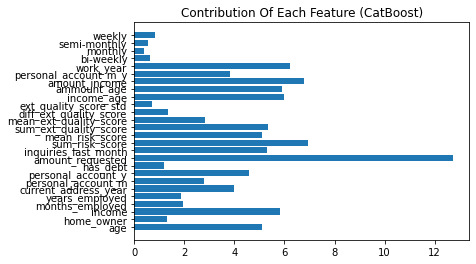

In [224]:
plt.barh(x.columns, ct_mod.feature_importances_)
plt.title("Contribution Of Each Feature (CatBoost)")
plt.show()

In [216]:
pred = ct_mod.predict_proba(test)[:,1]

In [217]:
pred.sum()

2890.5550220308664

In [218]:
entry = pd.read_csv('test.csv')['Entry_id']

In [219]:
sub = pd.DataFrame({'Entry_id':entry, 'e_signed':pred})

In [220]:
sub.to_csv('ola2.csv', index = False)

### KFOLD

In [238]:
X = x.copy()

In [240]:
from sklearn.model_selection import KFold

In [241]:
from catboost import CatBoostClassifier

In [272]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    print(f"The accuracy score of the {type(model).__name__} is {round(accuracy_score(y_test, y_pred) * 100)}")
    print(f"The F1 score of the {type(model).__name__} is {round(f1_score(y_test, y_pred, average='macro') * 100)}")
    print('AUC', roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

In [246]:
kf = KFold(n_splits=5,random_state=43,shuffle=True)
# cat_scores = []
# cat_proba = []
cat_pred = np.zeros(len(test))
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("================================Fold{fold}====================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

    cat = CatBoostClassifier(n_estimators= 5000, verbose =1000,random_state=7)
    cat.fit(X_train,y_train)
    evaluate(cat, X_test, y_test)
    
    cat_pred += cat.predict_proba(test)[:,1]

================================Fold0====================================
Learning rate set to 0.006298
0:	learn: 0.6926465	total: 29.5ms	remaining: 2m 27s
1000:	learn: 0.5968054	total: 23.7s	remaining: 1m 34s
2000:	learn: 0.5560198	total: 45.2s	remaining: 1m 7s
3000:	learn: 0.5213430	total: 1m 7s	remaining: 44.8s
4000:	learn: 0.4911988	total: 1m 29s	remaining: 22.4s
4999:	learn: 0.4643038	total: 1m 52s	remaining: 0us
The accuracy score of the CatBoostClassifier is 63%

The F1 score of the CatBoostClassifier is 62%


AUC 0.694769122085929
================================Fold1====================================
Learning rate set to 0.006298
0:	learn: 0.6926898	total: 22.9ms	remaining: 1m 54s
1000:	learn: 0.5964471	total: 21.3s	remaining: 1m 24s
2000:	learn: 0.5561050	total: 41.7s	remaining: 1m 2s
3000:	learn: 0.5206105	total: 1m 1s	remaining: 41.2s
4000:	learn: 0.4905512	total: 1m 21s	remaining: 20.3s
4999:	learn: 0.4648541	total: 1m 40s	remaining: 0us
The accuracy score of the CatBoos

### Stratified KFOLD

In [268]:
kf = StratifiedKFold(n_splits=5,random_state=43,shuffle=True)
# cat_scores = []
# cat_proba = []
cat_pred = np.zeros(len(test))
# thresh = 0.4
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("================================Fold{fold}====================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

    cat = CatBoostClassifier(n_estimators= 5000, verbose =1000,random_state=7)
    cat.fit(X_train,y_train)
    evaluate(cat, X_test, y_test)
    
    cat_pred += cat.predict_proba(test)[:,1]

================================Fold0====================================
Learning rate set to 0.006298
0:	learn: 0.6927211	total: 7.92ms	remaining: 39.6s
1000:	learn: 0.5965963	total: 7.07s	remaining: 28.2s
2000:	learn: 0.5554328	total: 14.2s	remaining: 21.2s
3000:	learn: 0.5206715	total: 20.9s	remaining: 13.9s
4000:	learn: 0.4908210	total: 27.7s	remaining: 6.92s
4999:	learn: 0.4647488	total: 34.5s	remaining: 0us
The accuracy score of the CatBoostClassifier is 64%

The F1 score of the CatBoostClassifier is 63%


AUC 0.6910609466315586
================================Fold1====================================
Learning rate set to 0.006298
0:	learn: 0.6927249	total: 7.45ms	remaining: 37.2s
1000:	learn: 0.5988134	total: 6.89s	remaining: 27.5s
2000:	learn: 0.5593066	total: 13.8s	remaining: 20.7s
3000:	learn: 0.5240044	total: 20.8s	remaining: 13.8s
4000:	learn: 0.4944957	total: 27.6s	remaining: 6.9s
4999:	learn: 0.4689360	total: 34.5s	remaining: 0us
The accuracy score of the CatBoostClassif

In [273]:
kf = StratifiedKFold(n_splits=10,random_state=43,shuffle=True)
# cat_scores = []
# cat_proba = []
cat_pred = np.zeros(len(test))
# thresh = 0.4
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("================================Fold{fold}====================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

    cat = CatBoostClassifier(n_estimators= 5000, verbose =3000,random_state=7)
    cat.fit(X_train,y_train)
    evaluate(cat, X_test, y_test)
    
    cat_pred += cat.predict_proba(test)[:,1]

================================Fold0====================================
Learning rate set to 0.006623
0:	learn: 0.6925408	total: 8.41ms	remaining: 42.1s
3000:	learn: 0.5242921	total: 21.8s	remaining: 14.5s
4999:	learn: 0.4710827	total: 35.9s	remaining: 0us
The accuracy score of the CatBoostClassifier is 63
The F1 score of the CatBoostClassifier is 62
AUC 0.693070451480316
================================Fold1====================================
Learning rate set to 0.006623
0:	learn: 0.6926194	total: 8.97ms	remaining: 44.8s
3000:	learn: 0.5248449	total: 21.2s	remaining: 14.1s
4999:	learn: 0.4718370	total: 35.1s	remaining: 0us
The accuracy score of the CatBoostClassifier is 65
The F1 score of the CatBoostClassifier is 64
AUC 0.7029298054074884
================================Fold2====================================
Learning rate set to 0.006623
0:	learn: 0.6926206	total: 8.83ms	remaining: 44.2s
3000:	learn: 0.5248567	total: 21.5s	remaining: 14.3s
4999:	learn: 0.4724868	total: 35.7s	r

In [269]:
cat_pred = cat_pred/5

In [274]:
cat_pred = cat_pred/10

In [275]:
cat_sub = pd.DataFrame({'Entry_id':entry, 'e_signed':cat_pred})

In [276]:
cat_sub.to_csv('cat_pred_strat10.csv', index = False)

### LightGBM

In [252]:
from lightgbm import LGBMClassifier

In [255]:
kf = KFold(n_splits=5,random_state=43,shuffle=True)
# lgb_scores = []
# lgb_proba = []
lgb_pred = np.zeros(len(test))
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("================================Fold{fold}====================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

    lgb = LGBMClassifier(n_estimators=5000, learning_rate=0.01, subsample=0.6,
                           colsample_bytree=0.5, max_depth=4,random_state = 7,
                        min_child_weight = 12,silent = True, num_leaves = 22)
    lgb.fit(X_train,y_train)
    evaluate(lgb, X_test, y_test)
    
    lgb_pred += lgb.predict_proba(test)[:,1]

================================Fold0====================================
The accuracy score of the LGBMClassifier is 62%

The F1 score of the LGBMClassifier is 62%


AUC 0.6849682101342239
================================Fold1====================================
The accuracy score of the LGBMClassifier is 63%

The F1 score of the LGBMClassifier is 63%


AUC 0.691035965638318
================================Fold2====================================
The accuracy score of the LGBMClassifier is 63%

The F1 score of the LGBMClassifier is 62%


AUC 0.6875165368125502
================================Fold3====================================
The accuracy score of the LGBMClassifier is 65%

The F1 score of the LGBMClassifier is 64%


AUC 0.7132936725341446
================================Fold4====================================
The accuracy score of the LGBMClassifier is 66%

The F1 score of the LGBMClassifier is 66%


AUC 0.7168940337007994


In [256]:
lgb_pred = lgb_pred/5

lgb_sub = pd.DataFrame({'Entry_id':entry, 'e_signed':lgb_pred})

lgb_sub.to_csv('lgb_pred.csv', index = False)

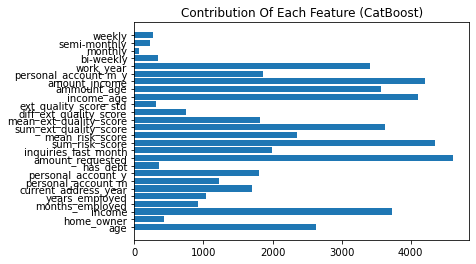

In [257]:
plt.barh(x.columns, lgb.feature_importances_)
plt.title("Contribution Of Each Feature (CatBoost)")
plt.show()

### Stacking

In [262]:
blend=(cat_pred + lgb_pred)/2

In [263]:
blend

array([0.44012162, 0.82870741, 0.48830435, ..., 0.58304373, 0.44723842,
       0.6271139 ])

In [260]:
cat_pred

array([0.47083173, 0.79848844, 0.48521857, ..., 0.56616963, 0.44596339,
       0.61241518])

In [261]:
lgb_pred

array([0.40941151, 0.85892637, 0.49139013, ..., 0.59991784, 0.44851346,
       0.64181262])

In [264]:
blend_sub = pd.DataFrame({'Entry_id':entry, 'e_signed':blend})

blend_sub.to_csv('blend.csv', index = False)